In [1]:
#-----Análise de preços de casas - Aula 02----



#importando biblioteca
import pandas as pd
from matplotlib import pyplot as plt 
#pd.set_option('display.float_format', lambda x: '%.2f'% x)

In [40]:
# carregando dataset
data = pd.read_csv('datasets/kc_house_data.csv')

In [41]:
# =======Perguntas e respostas:========

# 1-Crie uma nova coluna chamada: "dormitory_type" para classificar as casas em studio,apartament e house.
# Se o valor da coluna "bedrooms" for igual à 1 >'studio'
# Se o valor da coluna "bedrooms" for igual a 2 >'apartament'
# Se o valor da coluna "bedrooms" for maior que 2 >'house'

#criando coluna com os campos nulos
data['dormitory_type'] ='null'

data.loc[data['bedrooms']== 1,'dormitory_type']='studio'
data.loc[data['bedrooms']== 2,'dormitory_type']='apartament'
data.loc[data['bedrooms']> 2,'dormitory_type']='house'

In [46]:
#verificando se a alteração foi feita
print(data[['bedrooms', 'dormitory_type']])

       bedrooms dormitory_type
0             3          house
1             3          house
2             2     apartament
3             4          house
4             3          house
...         ...            ...
21608         3          house
21609         4          house
21610         2     apartament
21611         3          house
21612         2     apartament

[21613 rows x 2 columns]


<BarContainer object of 13 artists>

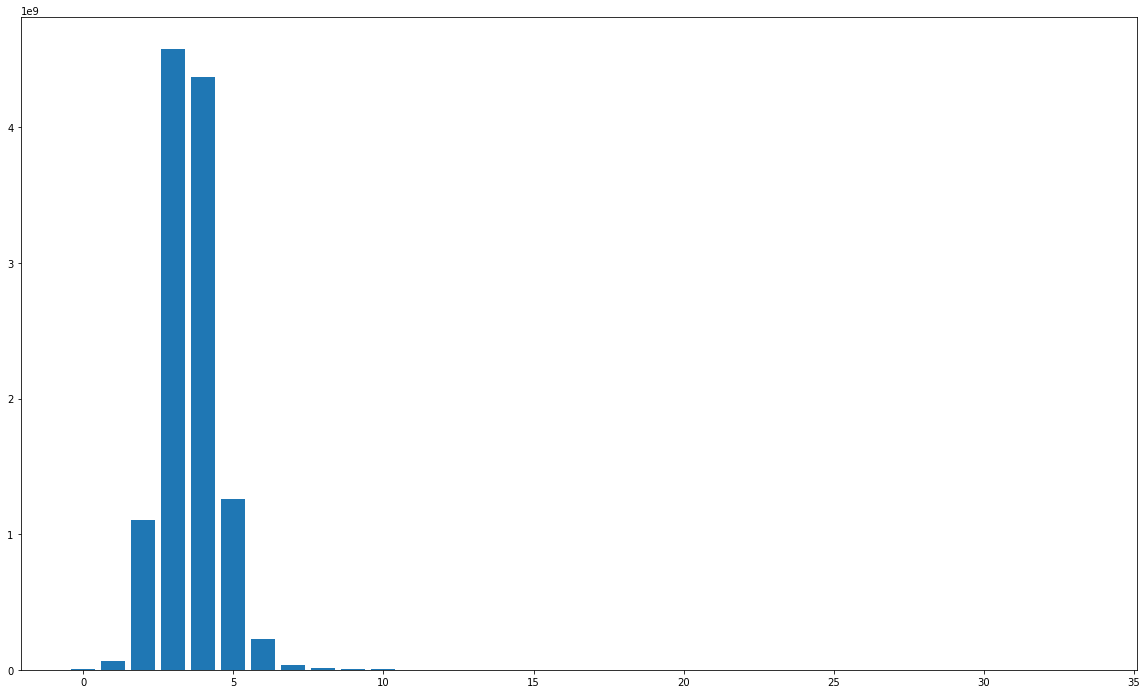

In [48]:
#2-Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

#importa a classe pyplot da biblioteca matplotlib
from matplotlib import pyplot as plt 

#adiciona o grupby da soma dos preços por ano na variavel by_year reseta o index da coluna year
by_sum=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index() 

#muda a escala pra ficar maior
plt.figure(figsize=(20,12))

# parametro do grafico de barras x,y
plt.bar(by_sum['bedrooms'],by_sum['price'] )  

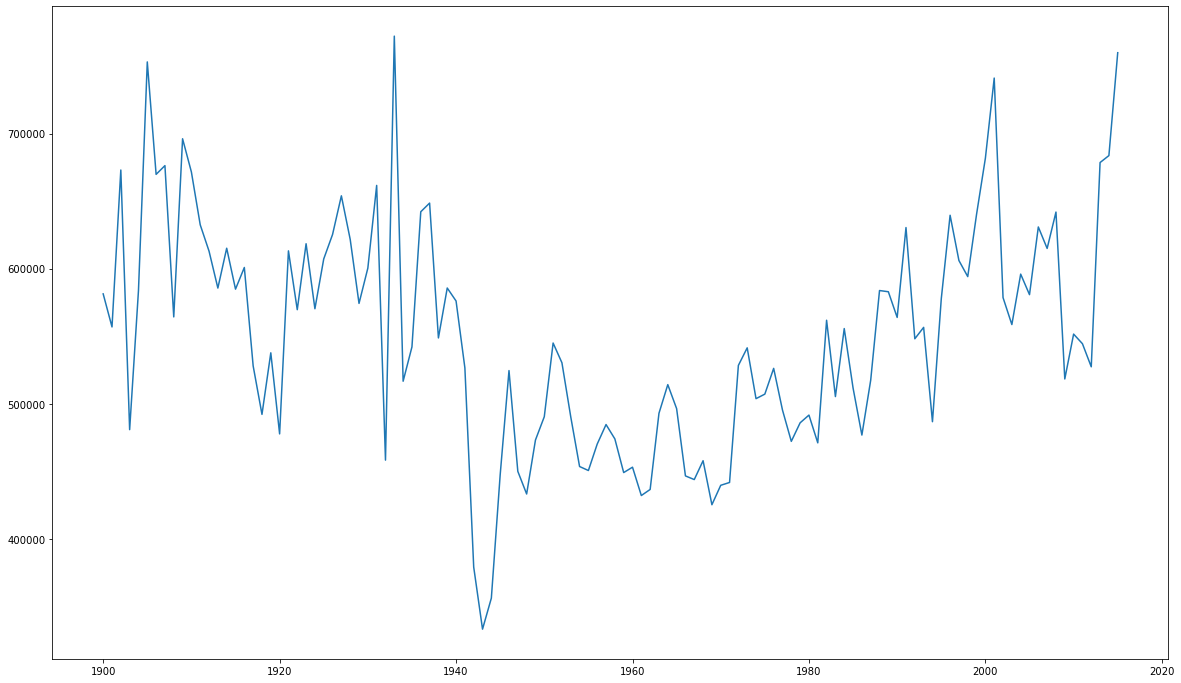

In [33]:
#3-Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

#adiciona o grupby da media dos preços por ano na variavel by_med reseta o index da coluna 
by_med=data[['price','yr_built']].groupby('yr_built').mean().reset_index() 

#muda a escala pra ficar maior
plt.figure(figsize=(20,12))

# parametro do grafico de barras x,y
plt.plot(by_med['yr_built'],by_med['price'] )  


<BarContainer object of 4 artists>

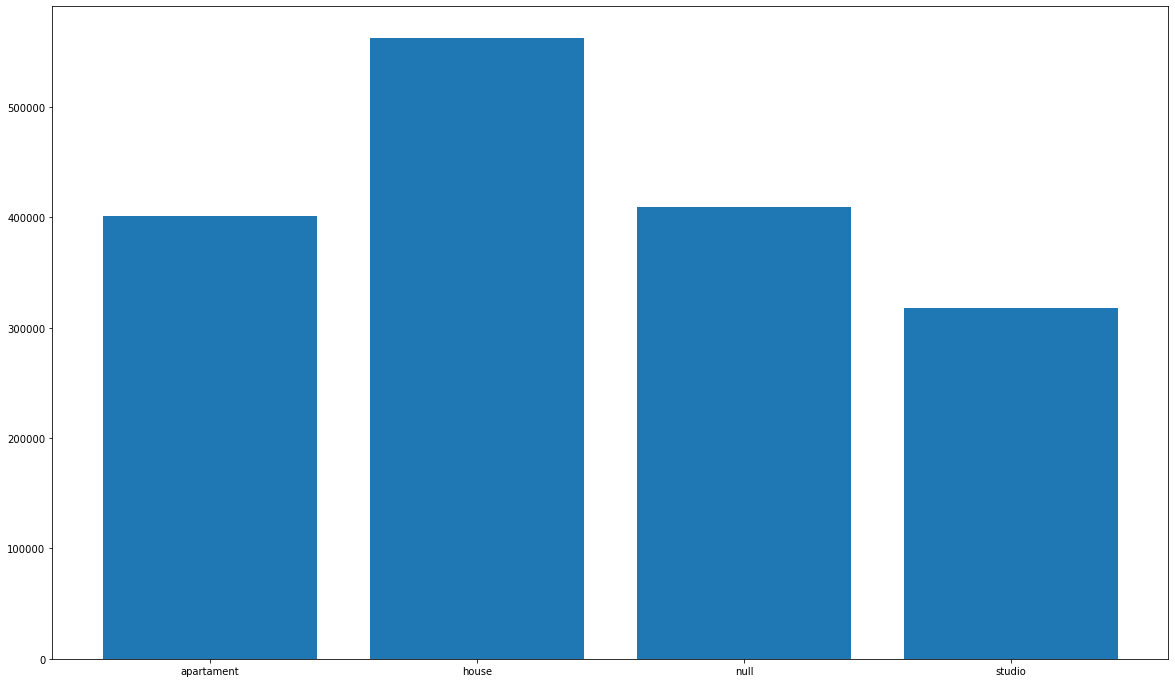

In [102]:
#4-Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.
#adiciona o grupby da media dos preços pelo tipo dos dormitorios dormitory_type  reseta o index da coluna 
by_med_tdorm=data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index() 

#deixa a escala do grafico maior
plt.figure(figsize=(20,12))

# parametro do grafico de barras x,y
plt.bar(by_med_tdorm['dormitory_type'], by_med_tdorm['price'] )  

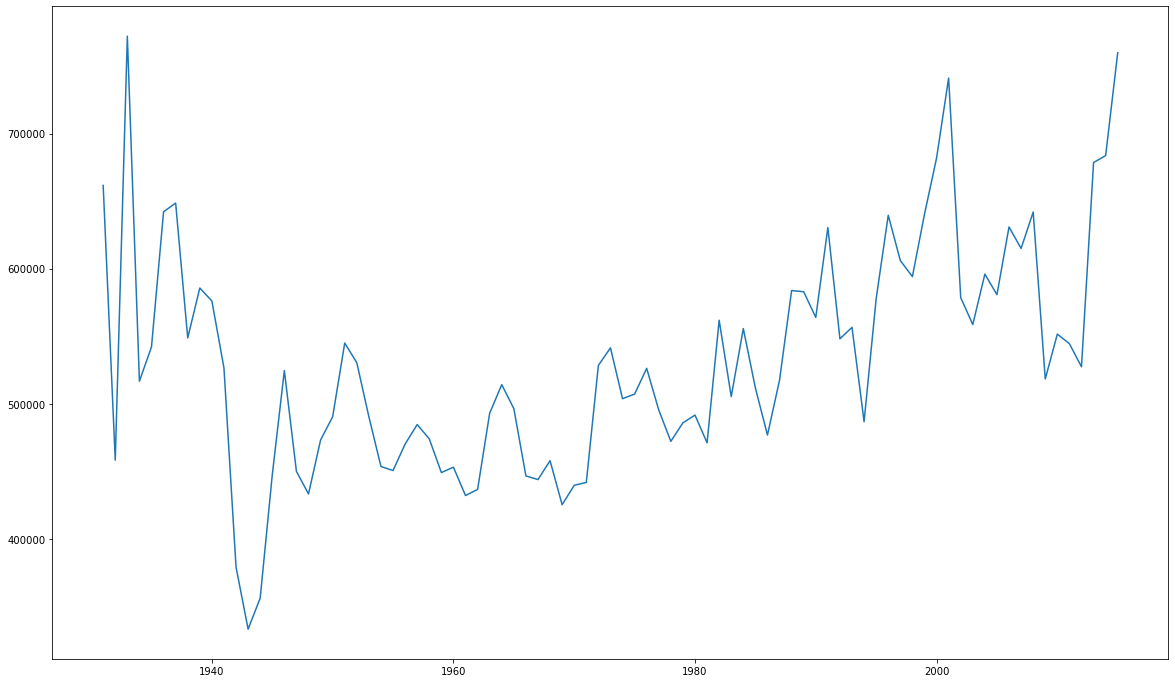

In [49]:
#5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos
#imóveis, a partir do ano de 1930.

#cria a variavel com as colunas selecionadas
colunasselecionadas=['price', 'yr_built']

#adiciona variavel com a função data.filter
dataf=data.filter(items=colunasselecionadas)

#agrupa os preços > 1930 mostrando a media por ano e reseta o index
datagroup=dataf[dataf.yr_built >1930].groupby('yr_built').mean().reset_index()

#deixa maior a escala do grafico
plt.figure(figsize=(20,12))

# parametro do grafico de barras x,y
plt.plot(datagroup['yr_built'],datagroup['price'] )  



In [104]:
#6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

#adiciona o grupby da media dos preços pelo tipo dos dormitorios dormitory_type e reseta o index da coluna
by_med_tdorm=data[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index() 


In [105]:
print(by_med_tdorm)

     yr_built dormitory_type     price
0        1900     apartament 589533.33
1        1900          house 584854.27
2        1900         studio 398944.00
3        1901     apartament 452856.40
4        1901          house 578619.17
..        ...            ...       ...
309      2014          house 692687.72
310      2014         studio 516500.00
311      2015     apartament 543250.00
312      2015          house 797383.06
313      2015         studio 385195.00

[314 rows x 3 columns]


<BarContainer object of 4 artists>

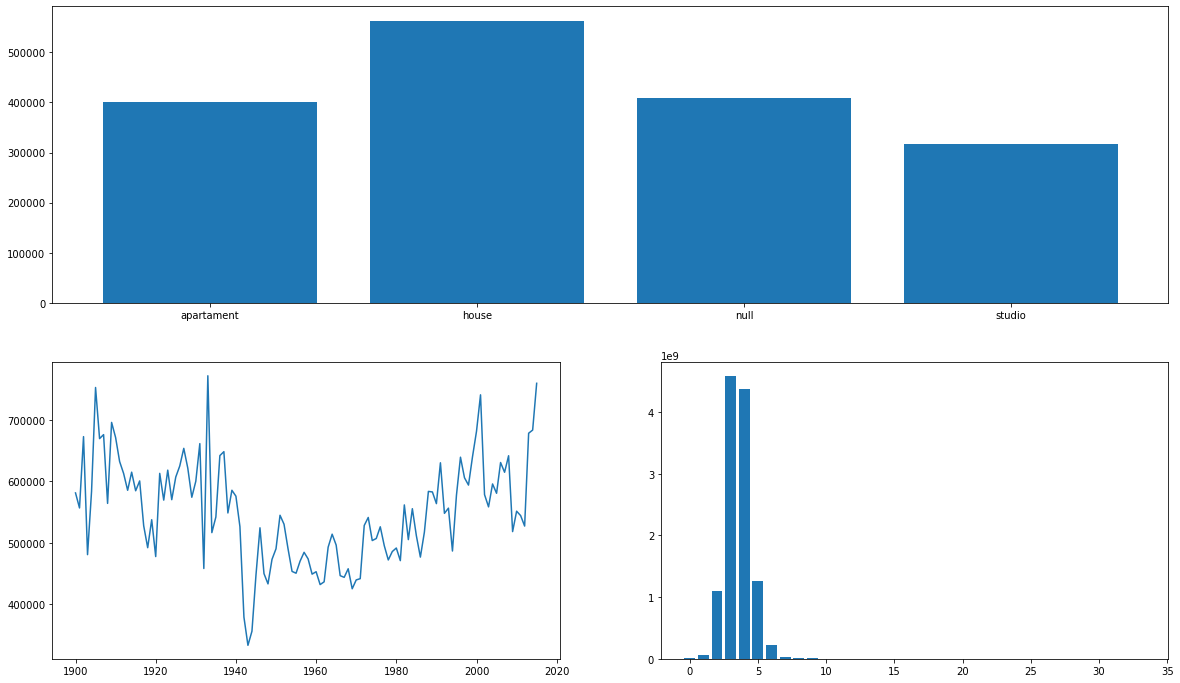

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [110]:
#7-Crie um Dashboard com os gráficos das questões 02, 03, 04 

#importa a ferramenta gridspec
from matplotlib import gridspec 

#aumenta aescala do grafico
fig= plt.figure(figsize=(20,12))

#adiciona a variavel specs os parametros de 2linhasx2colunas para o dashboards
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) 

ax1=fig.add_subplot(specs[0,:]) #primeira linha
ax2=fig.add_subplot(specs[1,0]) #primeira  linha- segunda coluna
ax3=fig.add_subplot(specs[1,1]) #segunda linha - segunda coluna

#--------------------------------------------------------------------------------------------------
#grafico 2
by_sum=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index() 
plt.figure(figsize=(20,12))
ax3.bar(by_sum['bedrooms'],by_sum['price'] )  

#grafico 3
by_med=data[['price','yr_built']].groupby('yr_built').mean().reset_index() 
plt.figure(figsize=(20,12))
ax2.plot(by_med['yr_built'],by_med['price'] )

#grafico 4
by_med_tdorm=data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index() 
plt.figure(figsize=(20,12))
ax1.bar(by_med_tdorm['dormitory_type'], by_med_tdorm['price'] )  

#---------------------------------------------------------------------------------------------------





